In [19]:
import open3d as o3d
from open3d.web_visualizer import draw
import matplotlib.pyplot as plt
import numpy as np

In [20]:
mesh = o3d.io.read_triangle_mesh("model.obj")

print(mesh)
print()
print("Vertices")
print(np.asarray(mesh.vertices))
print()
print("Triangles")
print(np.asarray(mesh.triangles))

TriangleMesh with 13589 points and 24584 triangles.

Vertices
[[-0.018455  0.065598  0.004396]
 [-0.017507  0.065107  0.003118]
 [-0.01979   0.060156  0.003684]
 ...
 [ 0.029529  0.008416  0.147497]
 [ 0.041966  0.039868  0.173016]
 [ 0.041966  0.039868  0.173016]]

Triangles
[[    0     1     2]
 [    3     0     2]
 [    4     2     1]
 ...
 [11911 11926 11912]
 [11925 11912 11926]
 [11912 11925 12295]]


In [37]:
mesh.compute_vertex_normals()
normals = np.asarray(mesh.vertex_normals)
triangles = np.asarray(mesh.triangles)
normals

array([[-0.9272744 ,  0.28274484, -0.24539262],
       [-0.47214914,  0.17066648, -0.86483995],
       [-0.68509918,  0.21707169, -0.6953553 ],
       ...,
       [ 0.25674418,  0.9575842 , -0.13082399],
       [-0.73805599,  0.11369643, -0.66509133],
       [ 0.51044507,  0.77324492, -0.37621553]])

In [22]:
normals_color = (normals + 1) / 2
normals_color

array([[0.0363628 , 0.64137242, 0.37730369],
       [0.26392543, 0.58533324, 0.06758002],
       [0.15745041, 0.60853584, 0.15232235],
       ...,
       [0.62837209, 0.9787921 , 0.43458801],
       [0.130972  , 0.55684822, 0.16745434],
       [0.75522253, 0.88662246, 0.31189224]])

In [23]:
verts = np.asarray(mesh.vertices)
verts

array([[-0.018455,  0.065598,  0.004396],
       [-0.017507,  0.065107,  0.003118],
       [-0.01979 ,  0.060156,  0.003684],
       ...,
       [ 0.029529,  0.008416,  0.147497],
       [ 0.041966,  0.039868,  0.173016],
       [ 0.041966,  0.039868,  0.173016]])

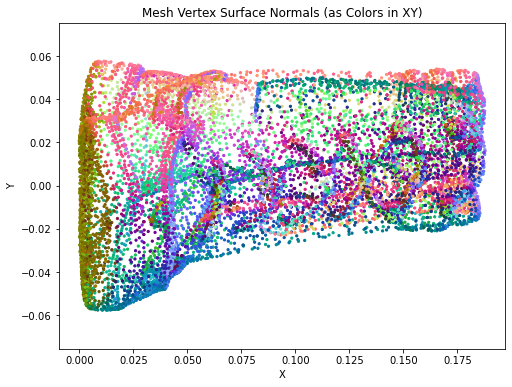

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(verts[:,2], verts[:,0], c=normals_color, s=5)
plt.title("Mesh Vertex Surface Normals (as Colors in XY)")
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


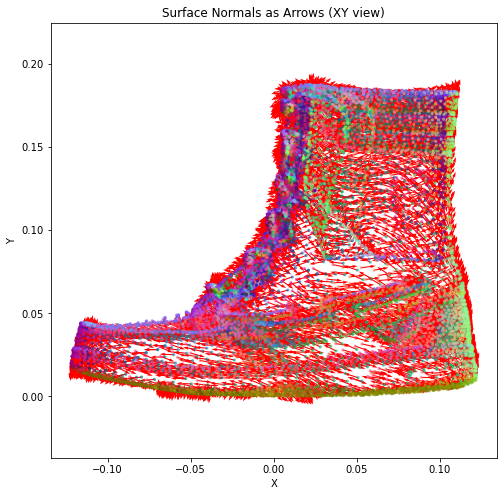

In [ ]:
x, y = verts[:, 1], verts[:, 2]
u, v = normals[:, 0], normals[:, 1]

plt.figure(figsize=(8, 8))
plt.quiver(x, y, u, v, color='red', scale=30)
plt.scatter(x, y, c=(normals + 1) / 2, s=5, alpha=0.5)
plt.title('Surface Normals as Arrows')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

In [41]:
for tri in triangles:
    print(tri)
    print(verts[tri])
    print(verts[tri, 1:])
    break

[0 1 2]
[[-0.018455  0.065598  0.004396]
 [-0.017507  0.065107  0.003118]
 [-0.01979   0.060156  0.003684]]
[[0.065598 0.004396]
 [0.065107 0.003118]
 [0.060156 0.003684]]


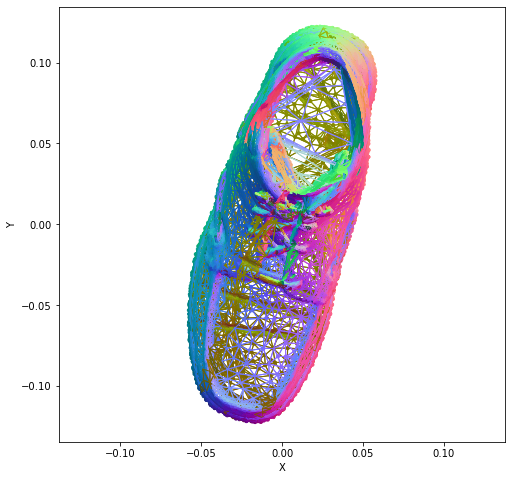

In [44]:
fig, ax = plt.subplots(figsize=(8,8))
for tri in triangles:
    pts = verts[tri, :2]
    color = normals_color[tri].mean(axis=0)
    ax.plot(*zip(*np.vstack([pts, pts[0]])), color=color, linewidth=1)

# Plot vertices colored by their normals
ax.scatter(verts[:,0], verts[:,1], c=normals_color, s=10)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('equal')
plt.show()